# Exploratory Data Analysis and Feature Engineering

Import necessary libraries and setup environment.

In [9]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

Load data and conduct initial exploration, checking for missing values.

In [11]:
# Path to data directory
data_dir = Path("./data")

# Dynamically load yearly data files into DataFrames
years = range(2011, 2016)
data_frames = {year: pd.read_csv(data_dir / f"gt_{year}.csv") for year in years}

# Combine dataframes according to splits
train_df = pd.concat([data_frames[2011], data_frames[2012]], ignore_index=True)
val_df = data_frames[2013]
test_df = pd.concat([data_frames[2014], data_frames[2015]], ignore_index=True)

# Save datasets to CSV files
train_df.to_csv(data_dir / "train_data.csv", index=False)
val_df.to_csv(data_dir / "val_data.csv", index=False)
test_df.to_csv(data_dir / "test_data.csv", index=False)

# Prepare training and validation sets
X_train = train_df.drop(columns='NOX')
y_train = train_df['NOX']
X_val = val_df.drop(columns='NOX')
y_val = val_df['NOX']

# Dataset summary
print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {test_df.shape}")

Train set shape: (15039, 10)
Validation set shape: (7152, 10)
Test set shape: (14542, 11)


In [ ]:
# Check for missing values and display descriptive statistics of the training dataset
print(train_df.isnull().sum())
print(train_df.describe())

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64
                 AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798

### Columns Description:<br>
AT - Ambient Temperature<br>
AP- Ambient Pressure<br>
AH-Ambient Humidity<br>
AFDP -Air Filter Differnt Pressure<br>
GTEP - Gas Turbine Exhaust Pressure<br>
TIT- Turbine Inlet Temmperature<br>
TAT- Turbine After Temprature<br>
CDP - Compressure discharge pressure<br>
TEY-Turbine Energy Yield<br>
CO-Carbon Monoxide<br>
NOx-Nitrogen Oxides<br>

# Correlation Analysis

Calculate and visualize correlation matrix.

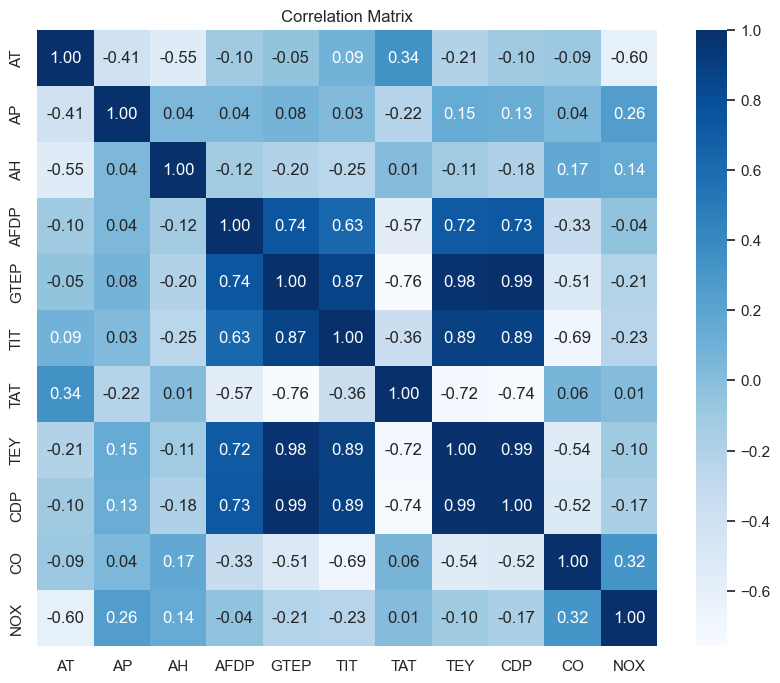

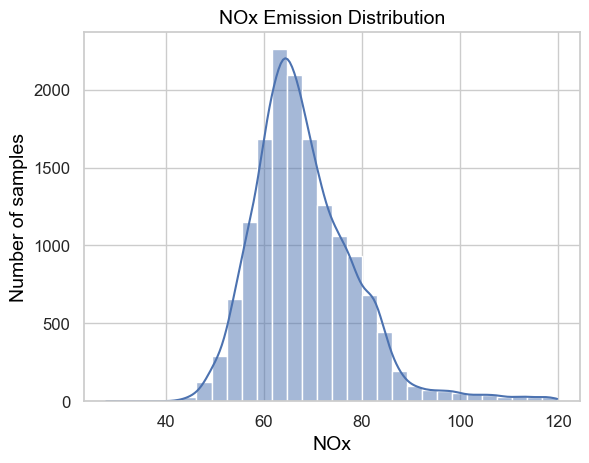

In [19]:
# Visualize the data
font_dict = {'family': 'arial', 'color':  'black', 'weight': 'normal', 'size': 14,}

# Correlation matrix
df_all = pd.concat([train_df])
plt.figure(figsize=(10, 8))
sns.heatmap(df_all.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

# Distribution of NOx emissions
sns.histplot(df_all['NOX'], bins=30, kde=True)
plt.title("NOx Emission Distribution", fontdict=font_dict)
plt.xlabel("NOx", fontdict=font_dict)   
plt.ylabel("Number of samples", fontdict=font_dict)
plt.xticks(fontsize=12, fontname='Arial')
plt.yticks(fontsize=12, fontname='Arial')
plt.show()

# Define Visualization Functions

Visualize the distributions of selected input features using histograms.

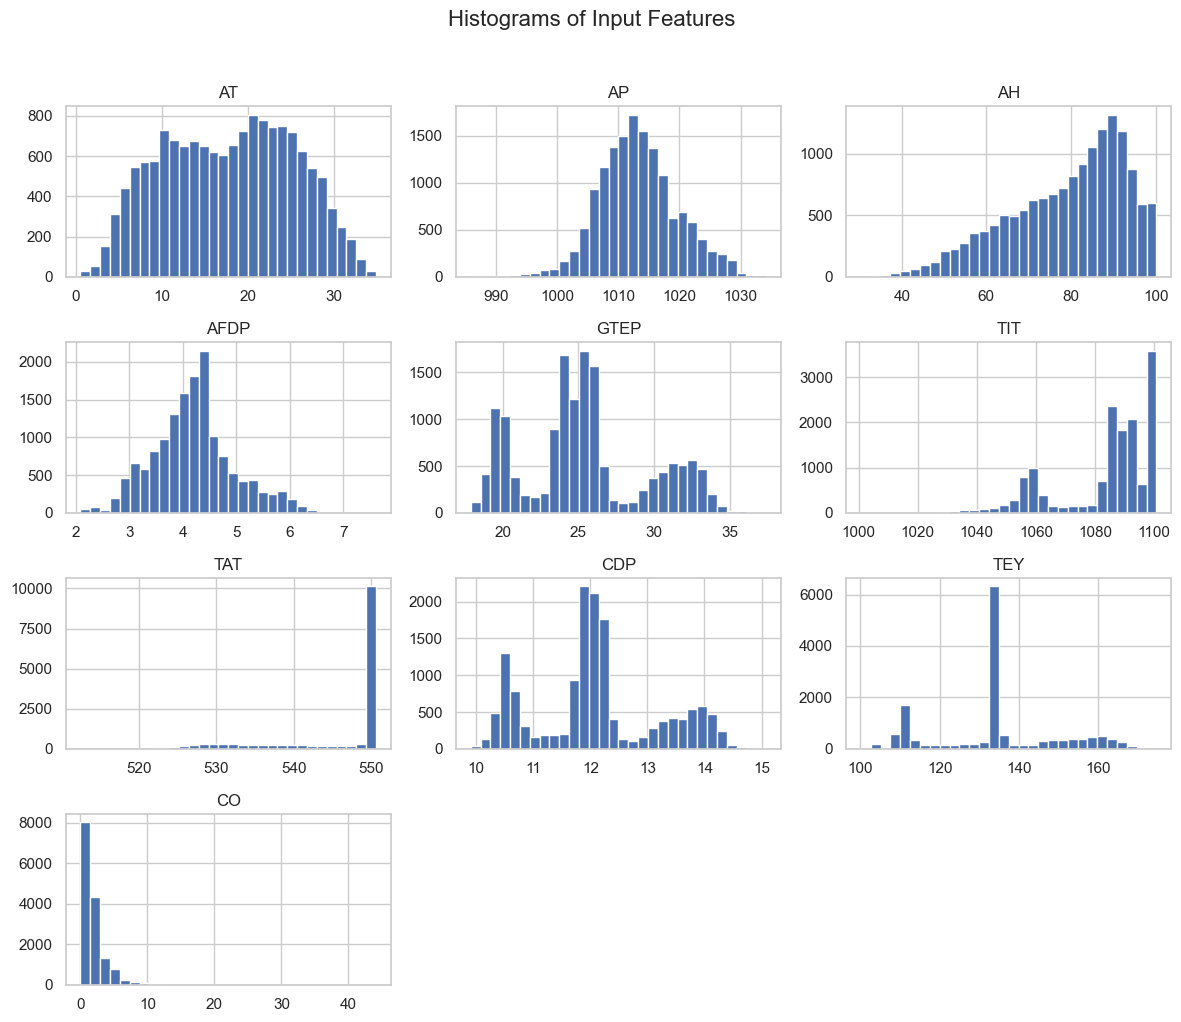

In [20]:
# Define selected input features
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'TEY', 'CO']

# Plot histograms
train_df[features].hist(figsize=(12, 10), bins=30)

# Add title
plt.suptitle("Histograms of Input Features", fontsize=16, y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

Identify features that are most strongly linearly correlated with the NOx emission by calculating and sorting Pearson correlation coefficients.

In [21]:
# Calculate Pearson correlation of each feature with the target variable NOx
nox_correlations = train_df.corr()['NOX'].drop('NOX').sort_values(ascending=False)

# Display sorted correlations
print("Features most correlated with NOx emissions:\n")
print(nox_correlations)


Features most correlated with NOx emissions:

CO      0.316743
AP      0.256744
AH      0.143061
TAT     0.009888
AFDP   -0.037299
TEY    -0.102631
CDP    -0.169103
GTEP   -0.208496
TIT    -0.231636
AT     -0.600006
Name: NOX, dtype: float64


Calculate the correlation of each feature with NOx emissions and visualize the results using a horizontal bar plot.

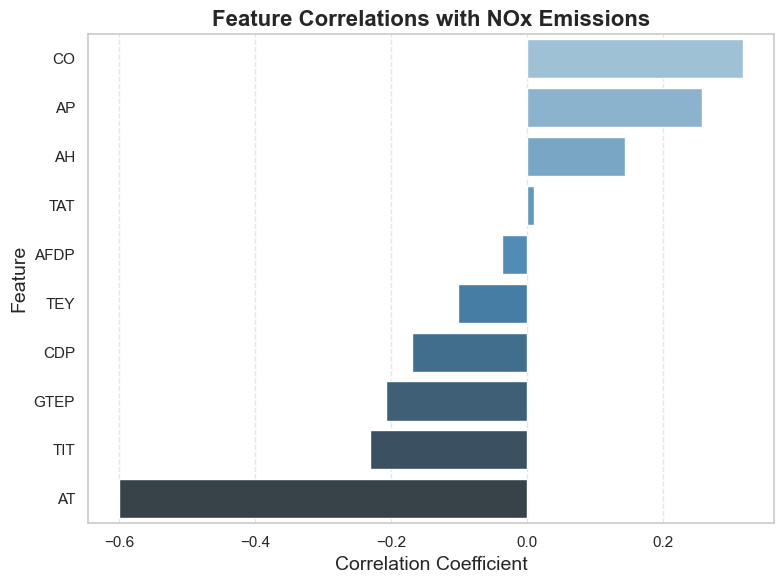

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation of each feature with NOx
nox_corr = train_df.corr()["NOX"].drop("NOX").sort_values(ascending=False)

# Set global font settings (optional)
plt.rcParams['font.family'] = 'Arial'

# Plot correlation values
plt.figure(figsize=(8, 6))
sns.barplot(x=nox_corr.values, y=nox_corr.index, hue=nox_corr.index, palette="Blues_d", legend=False)

plt.title("Feature Correlations with NOx Emissions", fontsize=16, fontweight='bold')
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

# Save the figure before showing
save_path = "./results/figures/correlation_with_nox.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

In [50]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
            AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NO

# Correlation Matrix Overview
The correlation matrix shows the strength and direction of linear relationships between gas turbine parameters, including the target variable NOX. Correlation values close to +1 or –1 indicate strong positive or negative linear relationships, respectively. Values near 0 suggest no linear relationship.

### Features Strongly Correlated with NOX
AT (Ambient Temperature): –0.60
➤ Strong negative correlation — an increase in ambient temperature significantly reduces NOX emissions. This is the most important single predictor in terms of NOX impact.

CO (Carbon Monoxide): +0.32
➤ Moderate positive correlation — higher CO concentrations are often associated with higher NOX levels, possibly due to shared causes like inefficient combustion.

AP (Ambient Pressure): +0.26
➤ Mild positive correlation — higher ambient pressure slightly increases NOX emissions, potentially through better combustion efficiency and increased flame temperature.

### Features Weakly or Not Significantly Correlated with NOX
TIT (Turbine Inlet Temperature): –0.23

GTEP (Gas Turbine Energy Production): –0.21

CDP (Compressor Discharge Pressure): –0.17

TEY (Turbine Exhaust Yield): –0.10

AH (Ambient Humidity): +0.14

AFDP (Air Flow Discharge Pressure): –0.04

TAT (Turbine After Temperature): +0.01

➤ Although some of these are core turbine parameters, their direct linear correlation with NOX is weak. Their influence may be non-linear or masked by stronger variables like AT or AP.

### Highly Collinear Feature Pairs (Multicollinearity)
GTEP vs CDP: 0.99

TEY vs CDP: 0.99

GTEP vs TEY: 0.98

TIT vs TEY: 0.89

AFDP vs GTEP: 0.74

➤ These features share very strong mutual relationships and should not be used together without applying dimensionality reduction or feature selection.

### Summary Table
| Feature              | Correlation with NOX                      | Interpretation                                   |
| -------------------- | ----------------------------------------- | ------------------------------------------------ |
| **AT**               | **–0.60**                                 | Keep — strongest individual influence            |
| **CO**               | **+0.32**                                 | Keep — moderate correlation, likely informative  |
| **AP**               | **+0.26**                                 | Consider including                               |
| **GTEP/TEY/CDP/TIT** | Weak with NOX, but highly intercorrelated | Reduce redundancy via feature selection or PCA   |
| **AH**               | **+0.14**                                 | Weak — may be useful in ratio form (e.g., AH/AT) |


### Recommended Features for Further Analysis
AT – key variable

CO

AP

Humidity-to-Temperature Ratio (e.g., AH / AT) — a derived feature

Energy Efficiency Index (e.g., TEY / GTEP) — a potentially informative indicator

Define a reusable function to generate individual boxplots for multiple features to visually identify outliers. The function supports flexible layout, labeling, and optional export to file.

Boxplots saved to ./results/figures/individual_boxplots.png


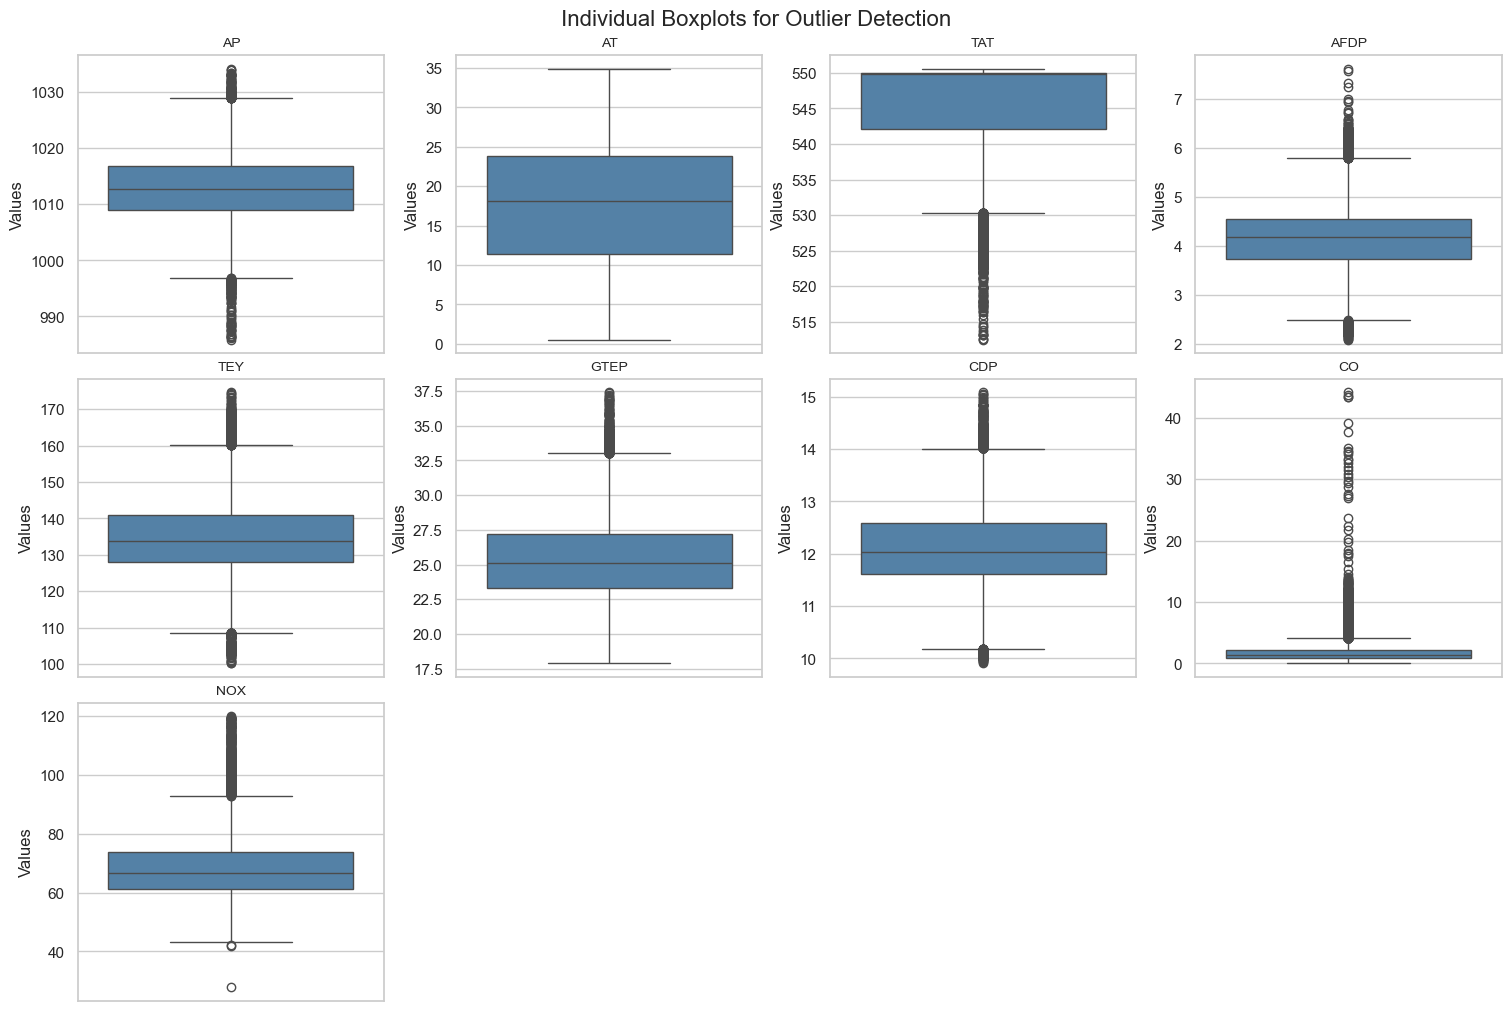

In [22]:
def plot_individual_boxplots_for_outliers(
        dataframe,
        features,
        title="Boxplots for Outlier Detection",
        figsize=(15, 10),
        palette="steelblue",
        save_path=None
):
    """
    Plots individual boxplots for outlier detection for each selected feature and optionally saves the plot.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the features.
    - features (list): List of feature column names to include in the boxplots.
    - title (str): Title of the overall plot.
    - figsize (tuple): Size of the figure grid.
    - palette (str): Color palette for the boxplots.
    - save_path (str): Path to save the plot as an image (default is None, meaning no saving).
    """
    num_features = len(features)
    rows = (num_features // 4) + (num_features % 4 > 0)  # Calculate number of rows for 4 columns

    # Create subplots
    fig, axes = plt.subplots(rows, 4, figsize=figsize, constrained_layout=True)
    axes = axes.flatten()  # Flatten axes array for easier indexing

    # Plot each feature
    for i, feature in enumerate(features):
        sns.boxplot(data=dataframe, y=feature, ax=axes[i], color=palette)
        axes[i].set_title(feature, fontsize=10)
        axes[i].set_ylabel("Values")
        axes[i].set_xlabel("")
    
    # Hide empty subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    # Add a main title
    fig.suptitle(title, fontsize=16)

    # Save the plot if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Boxplots saved to {save_path}")

    plt.show()

# Usage
key_features = ['AP', 'AT', 'TAT', 'AFDP', 'TEY', 'GTEP', 'CDP', 'CO', 'NOX']
plot_individual_boxplots_for_outliers(
    dataframe=train_df,
    features=key_features,
    title="Individual Boxplots for Outlier Detection",
    save_path="./results/figures/individual_boxplots.png"
)


### Feature Engineering

AT (original feature): Strong negative correlation with NOx.<br>
TEY (original feature): Moderate positive correlation with NOx.<br>
CDP (original feature): Weak but interpretable correlation with NOx.<br>
Pressure Ratio (CDP/AP)<br>
Combustion Efficiency (TIT - TAT)<br>
Energy Efficiency (TEY/GTEP)<br>
Humidity Correction Factor (AH/AT)<br>

In [29]:
# Create new features
for df in [train_df, val_df, test_df]:
    df['Pressure_Ratio'] = df['CDP'] / df['AP']
    df['Combustion_Efficiency'] = df['TIT'] - df['TAT']
    df['Energy_Efficiency'] = df['TEY'] / df['GTEP']
    df['Humidity_Temperature_Ratio'] = df['AH'] / df['AT']

# Display the first few rows to verify
train_df[['Pressure_Ratio', 'Combustion_Efficiency', 'Energy_Efficiency', 'Humidity_Temperature_Ratio']].head()

,Pressure_Ratio,Combustion_Efficiency,Energy_Efficiency,Humidity_Temperature_Ratio
0,0.011680,536.37,5.616164,18.238589
1,0.011678,536.05,5.622730,19.620563
2,0.011824,536.31,5.631513,21.733385
3,0.011775,536.33,5.647192,22.821348
4,0.011702,535.90,5.630723,22.705512


In [30]:
# Display the first few rows
train_df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,Pressure_Ratio,Combustion_Efficiency,Energy_Efficiency,Humidity_Temperature_Ratio
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,0.011680,536.37,5.616164,18.238589
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,0.011678,536.05,5.622730,19.620563
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,0.011824,536.31,5.631513,21.733385
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,0.011775,536.33,5.647192,22.821348
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,0.011702,535.90,5.630723,22.705512


Plot a customizable correlation heatmap with optional masking, annotations, and export.

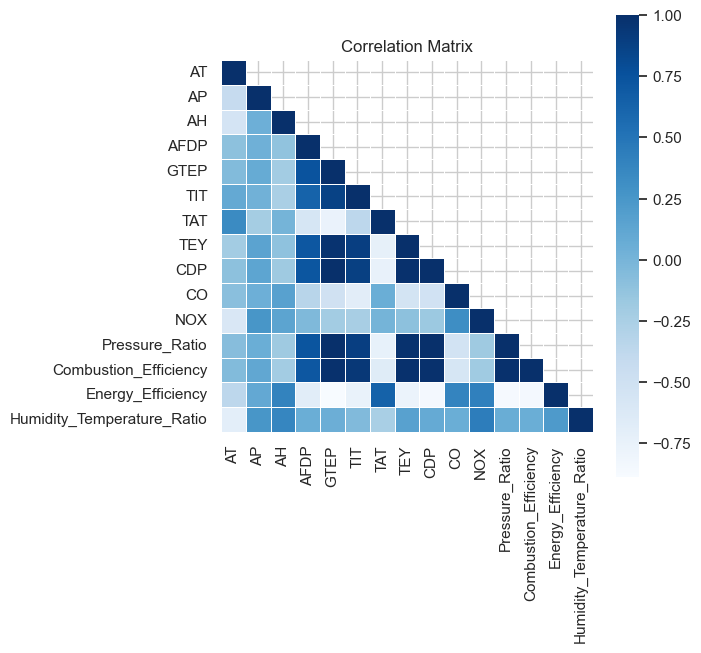

In [41]:
# Generate and save a heatmap showing feature correlations in the training dataset
def plot_correlation_heatmap(
        dataframe, title="Correlation Heatmap",
        figsize=(6,6),
        cmap='Blues',
        annot=False,
        mask_upper=True,
        save_path=None
):
    """
    Plots a correlation heatmap for the given DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to compute correlations.
    - title (str): The title of the heatmap.
    - figsize (tuple): Size of the heatmap figure.
    - cmap (str): Color map for the heatmap.
    - annot (bool): Whether to display annotations on the heatmap.
    - mask_upper (bool): If True, masks the upper triangle (default: True).
    - save_path (str): Path to save the heatmap image.
    """
    correlation_matrix = dataframe.corr()
    
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1) if mask_upper else np.tril(np.ones_like(correlation_matrix, dtype=bool))

    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, 
                mask=mask, 
                annot=annot, 
                cmap=cmap, 
                fmt='.2f', 
                linewidths=0.5, 
                linecolor='white', 
                square=True
    )

    plt.title(title)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")

    plt.show()

# Usage
plot_correlation_heatmap(train_df, title="Correlation Matrix", save_path="./results/figures/correlation_heatmap_new_features.png")

# Top Features for Predicting NOX (based on correlation)

| Feature                          | Correlation with NOX | Notes                                                       |
| -------------------------------- | -------------------- | ----------------------------------------------------------- |
| **AT (Ambient Temperature)**     | **–0.60**            | Very strong negative correlation — a key predictive feature |
| **CO (Carbon Monoxide)**         | +0.32                | Moderate positive correlation                               |
| **Energy\_Efficiency**           | +0.48                | High correlation — informative and interpretable            |
| **Humidity\_Temperature\_Ratio** | +0.57                | Strong positive correlation — worth keeping                 |

### Redundant or Uninformative Features — Candidates for Removal
These features exhibit very high multicollinearity (correlation ≈ 0.99) with each other. They do not provide additional unique information and may harm model performance, especially in linear models due to instability or overfitting.

| Feature                    | Correlation with Others              | Reason for Removal                                     |
| -------------------------- | ------------------------------------ | ------------------------------------------------------ |
| **GTEP**                   | 0.99 with CDP, 0.98 with TEY         | Highly redundant                                       |
| **TEY**                    | 0.99 with CDP, 0.98 with GTEP        | Same information already captured elsewhere            |
| **CDP**                    | 0.99 with GTEP, TEY, Pressure\_Ratio | High redundancy with multiple features                 |
| **AFDP**                   | 0.74 with GTEP                       | Weak correlation with NOX, partially duplicated signal |
| **Pressure\_Ratio**        | 0.99 with GTEP and CDP               | No added value over GTEP/CDP                           |
| **Combustion\_Efficiency** | 0.99 with TEY and CDP                | Redundant with already selected features               |


# Feature Selection

Select the most relevant features for modeling.

In [42]:
# Select features for training
selected_features = [
    'AT',
    'CO',
    'AP',
    'Energy_Efficiency',
    'Humidity_Temperature_Ratio',
    'Combustion_Efficiency'
]
# Prepare the training set with selected features
train=train_df[selected_features].round(2)
train.head()


,AT,CO,AP,Energy_Efficiency,Humidity_Temperature_Ratio,Combustion_Efficiency
0,4.59,0.33,1018.7,5.62,18.24,536.37
1,4.29,0.45,1018.3,5.62,19.62,536.05
2,3.90,0.45,1018.4,5.63,21.73,536.31
3,3.74,0.23,1018.3,5.65,22.82,536.33
4,3.75,0.27,1017.8,5.63,22.71,535.90


***

# Import Machine Learning Models

Import required models from libraries.

In [ ]:
# Save the training set with selected features
import joblib

# Scikit-learn: models, evaluation, preprocessing, pipelines
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    root_mean_squared_error,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# XGBoost
from xgboost import XGBRegressor

# TensorFlow / Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


Prepare training and validation sets

In [50]:
# Select input features and target variable for training and validation
X_train = train_df[selected_features]
y_train = train_df["NOX"]
X_val = val_df[selected_features]
y_val = val_df["NOX"]

# Random Forest + GridSearchCV

In [56]:

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Random Forest + Hyperparameter Tuning
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [10, 20, 30, None],         # Maximum tree depth
    'min_samples_split': [2, 5, 10],         # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4]            # Min samples per leaf
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5, 
    n_jobs=-1, 
    scoring='neg_root_mean_squared_error', 
    verbose=1
)

# Model Training
grid_search.fit(X_train_scaled, y_train)

# Best model from grid search
best_rf = grid_search.best_estimator_

# Evaluation
y_pred = best_rf.predict(X_val_scaled)
mae_rf = mean_absolute_error(y_val, y_pred)
r2_rf = r2_score(y_val, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred))

print("Best Params:", grid_search.best_params_)
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.3f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest MAE: 4.87
Random Forest RMSE: 6.85
Random Forest R²: 0.677


# XGBoost + GridSearchCV + Pipeline + StandardScaler

In [61]:
# Define pipeline: scaling + XGBoost regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# 'xgb__' prefix is used because parameters are inside the pipeline
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 6, 10],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1.0]
}

# Hyperparameter tuning using cross-validation
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_absolute_error', 
    n_jobs=-1, 
    verbose=1
)

# Train model with cross-validated grid search
grid_search.fit(X_train, y_train)

# Make predictions and evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

# Calculate evaluation metrics
mae_xb = mean_absolute_error(y_val, y_pred)
r2_xb = r2_score(y_val, y_pred)
rmse_xb = np.sqrt(mean_squared_error(y_val, y_pred))

# Print performance and best parameters
print("Best Params:", grid_search.best_params_)
print(f"XGB MAE: {mae_xb:.2f}")
print(f"XGB RMSE: {rmse_xb:.2f}")
print(f"XGB R²: {r2_xb:.3f}")

# Extract the fitted scaler from the pipeline
scaler = best_model.named_steps['scaler']

#Save the full pipeline and individual scaler using joblib
joblib.dump(grid_search.best_estimator_, 'best_model_xgb.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("Model and scaler saved.")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Params: {'xgb__learning_rate': 0.2, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}
XGB MAE: 4.81
XGB RMSE: 6.77
XGB R²: 0.684
Model and scaler saved.


#  MLP Model for NOX Regression (using TensorFlow/Keras)

Epoch 1/500


c:\Users\Ala\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1907 - val_loss: 0.2566
Epoch 2/500
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1108 - val_loss: 0.2290
Epoch 3/500
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1069 - val_loss: 0.2218
Epoch 4/500
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1022 - val_loss: 0.2175
Epoch 5/500
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0992 - val_loss: 0.2136
Epoch 6/500
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0964 - val_loss: 0.2100
Epoch 7/500
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0935 - val_loss: 0.2063
Epoch 8/500
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0914 - val_loss: 0.2035
Epoch 9/500
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0889 - val_loss: 0.2014
Epoch 10/500
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0868 - val_loss: 0.2001
Epoch 11/500
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0850 - val_loss: 0.1992
Epoch 12/500
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

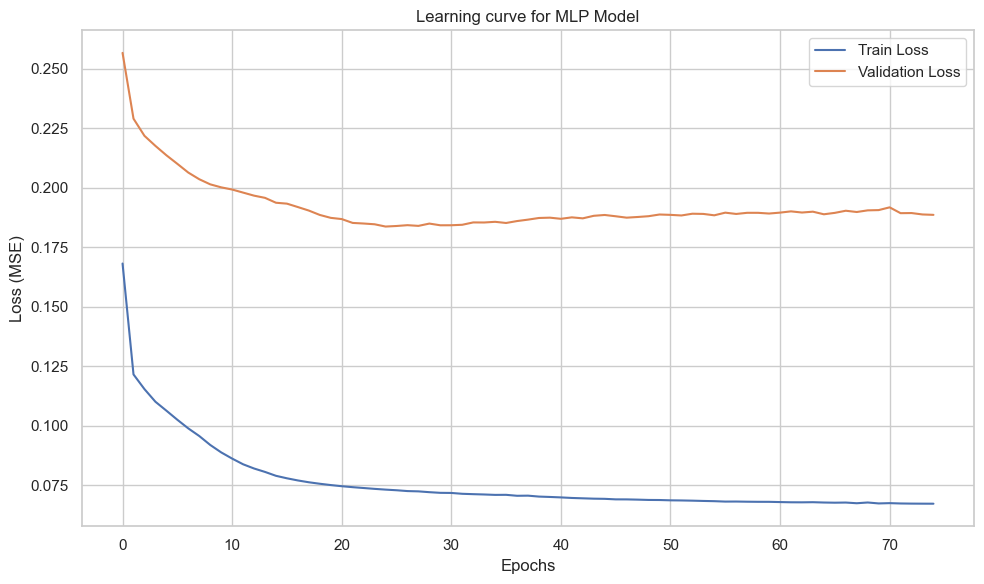

In [66]:
# Feature scaling (standardization)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))

# Define MLP architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1)) # Output layer for regression

# Compile model with Huber loss (robust to outliers)
model.compile(optimizer='adam', loss='huber')

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=50, 
    restore_best_weights=True
)

# Fit model using validation on val_df
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=500,
    batch_size=32,
    shuffle=False,
    callbacks=[early_stop],
    verbose=1
)

# Predict and inverse-transform predictions
y_pred_scaled_2 = model.predict(X_val_scaled)
y_pred_2 = scaler_y.inverse_transform(y_pred_scaled_2)
y_val_true_2 = scaler_y.inverse_transform(y_val_scaled.reshape(-1, 1))

# Evaluate performance using regression metrics
mae_MLP_2 = mean_absolute_error(y_val_true_2, y_pred_2)
rmse_MLP_2 = root_mean_squared_error(y_val_true_2, y_pred_2)
r2_MLP_2 = r2_score(y_val_true_2, y_pred_2)

print(f"MLP2 MAE: {mae_MLP_2:.2f}")
print(f"MLP2 RMSE: {rmse_MLP_2:.2f}")
print(f"MLP2 R²: {r2_MLP_2:.3f}")

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning curve for MLP Model')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Learning Curve Interpretation:
The training and validation loss curves are well-separated but stable, indicating a healthy learning process without signs of overfitting or underfitting.
The validation loss plateaus and fluctuates around a steady level, suggesting that regularization and early stopping are functioning effectively.
Moreover, the absence of erratic spikes or instability in the curve implies that the validation strategy is appropriate, and the dataset is sufficiently large and well-structured for training.

***

# Comparison of Regression Models for NOₓ Emission Prediction

In [ ]:
# Compare model performance
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'MLP'],
    'MAE': [mae_rf, mae_xb, mae_MLP_2],
    'RMSE': [rmse_rf, rmse_xb, rmse_MLP_2],
    'R²': [r2_rf, r2_xb, r2_MLP_2]
})

comparison_df.round(3)

,Model,MAE,RMSE,R²
0,Random Forest,4.867,6.852,0.677
1,XGBoost,4.807,6.768,0.684
2,MLP,4.834,6.758,0.685


***

# Final Evaluation on the Test Set Using XGBoost Model

Prediction complete. Results saved to NOX_predictions_from_test.csv


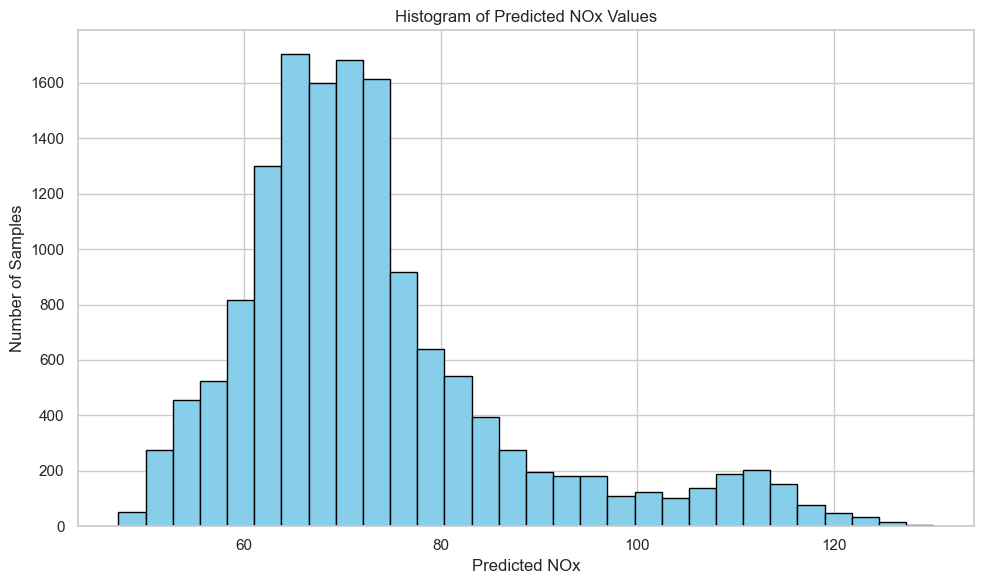

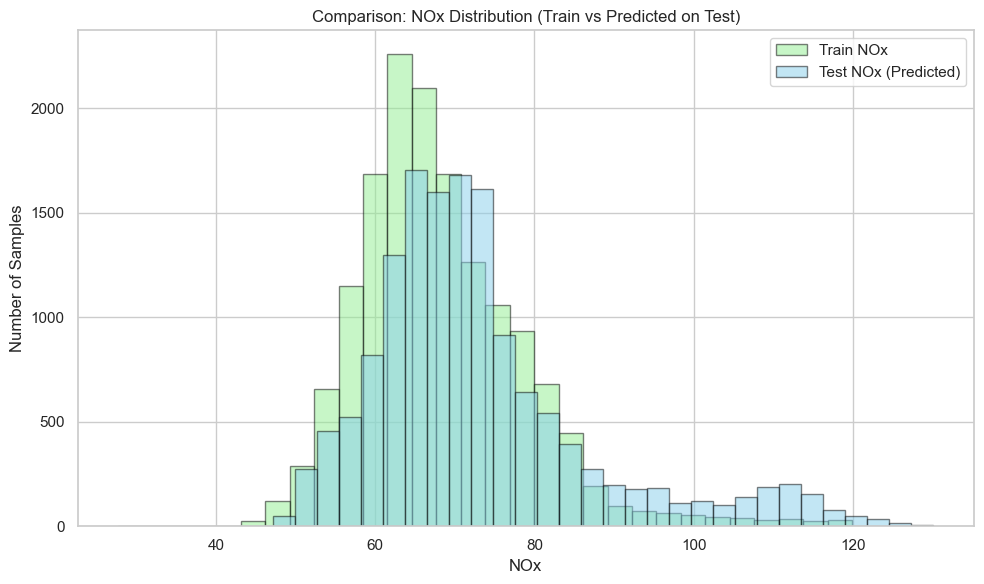

In [74]:
# Load test dataset
test_df = pd.read_csv("data/test_data.csv")

# Load trained model 
# Scaling is handled internally in the pipeline, no need to apply it manually
model = joblib.load("best_model_xgb.joblib")

# Create new features in the test dataset
test_df['Pressure_Ratio'] = test_df['CDP'] / test_df['AP']
test_df['Combustion_Efficiency'] = test_df['TIT'] - test_df['TAT']
test_df['Energy_Efficiency'] = test_df['TEY'] / test_df['GTEP']
test_df['Humidity_Temperature_Ratio'] = test_df['AH'] / test_df['AT']

# Selected features used during training
selected_features = ["AT", "CO", "AP", "Energy_Efficiency", "Humidity_Temperature_Ratio", "Combustion_Efficiency"]

# Prepare test data
X_test = test_df[selected_features]

# Predict NOX values using the trained model
y_pred_test = model.predict(X_test)

# Save predictions to CSV
test_df["NOX_predicted"] = y_pred_test
test_df[["NOX_predicted"]].to_csv("NOX_predictions_from_test.csv", index=False)
print("Prediction complete. Results saved to NOX_predictions_from_test.csv")

# Visualize the distribution of predicted NOX values
plt.figure(figsize=(10, 6))
plt.hist(y_pred_test, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Predicted NOx Values")
plt.xlabel("Predicted NOx")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.tight_layout()
plt.show()

# Compare the distribution of NOX in the training set and the predicted values from the test set
plt.figure(figsize=(10, 6))
plt.hist(train_df["NOX"], bins=30, alpha=0.5, label="Train NOx", color='lightgreen', edgecolor='black')
plt.hist(y_pred_test, bins=30, alpha=0.5, label="Test NOx (Predicted)", color='skyblue', edgecolor='black')
plt.title("Comparison: NOx Distribution (Train vs Predicted on Test)")
plt.xlabel("NOx")
plt.ylabel("Number of Samples")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Comment on Results (Distribution of Predicted NOx on Test Set):

The first histogram shows the distribution of NOx predictions generated by the XGBoost model on the test set. The distribution is smooth, unimodal, and resembles a slightly right-skewed bell shape, which indicates stable generalization and an absence of extreme outliers. This suggests that the model has learned the underlying distribution of the target variable without producing erratic predictions.

The second histogram compares the predicted NOx distribution (test set) with the original NOx values from the training data. While the shapes are broadly similar—with peaks around 65–70 mg/m³—the predicted distribution is slightly wider, with a longer tail extending toward higher NOx values (up to ~130 mg/m³). This spread may indicate that the model captures a broader variance in the unseen data or that the operational conditions in the test period included more extreme cases.

Importantly, the close overlap between the two curves shows that the model generalizes well, and there's no major distribution shift between the training and predicted test sets. This validates both the training process and the selected features used for inference. Overall, the results are consistent with a model that is reliable for deployment in a real-world industrial context.

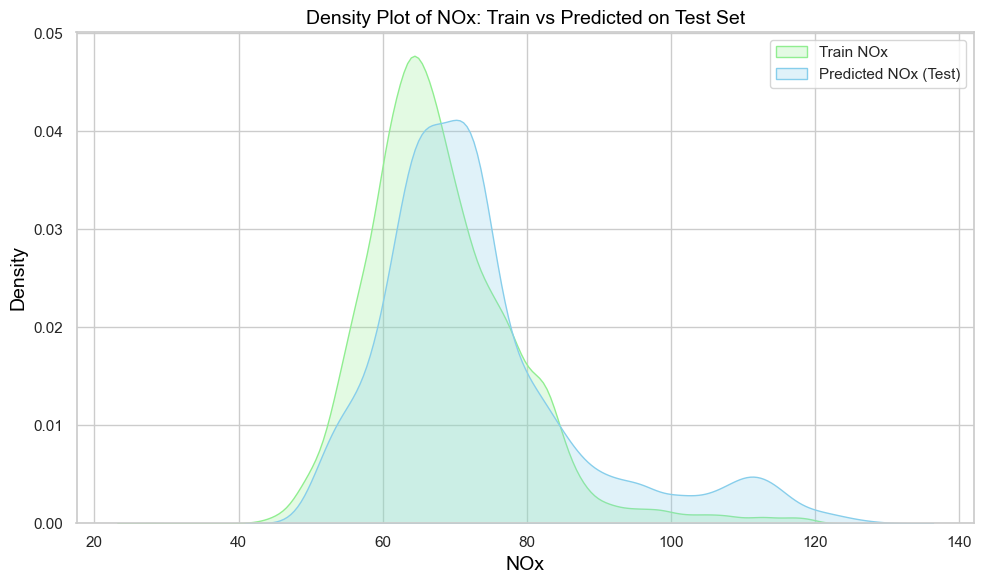

In [75]:
# Set font properties 
font_dict = {
    'family': 'arial', 
    'color':  'black', 
    'weight': 'normal', 
    'size': 14,
}

# Create KDE plot comparing NOx distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df["NOX"], label="Train NOx", fill=True, color='lightgreen')
sns.kdeplot(y_pred_test, label="Predicted NOx (Test)", fill=True, color='skyblue')

# Set titles and labels
plt.title("Density Plot of NOx: Train vs Predicted on Test Set", font_dict)
plt.xlabel("NOx", font_dict)
plt.ylabel("Density", font_dict)

# Add legend and formatting
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# NOx Density Distribution Comparison

The KDE (Kernel Density Estimate) curves show very similar distribution profiles between the training data and the predicted test values. The predicted NOx values are slightly shifted toward the center, indicating the model exhibits conservative behavior by reducing the influence of extreme values.

This close alignment suggests strong generalization ability of the XGBoost model, with no major distributional mismatch.

***

# Conclusion:
The XGBoost model, trained with GridSearchCV and proper feature scaling, performs reliably and consistently. The predicted NOx values closely replicate the target variable distribution seen in the training set, demonstrating that the model is well-suited for application to new, unseen data.

This model and the visualizations can confidently be included in reports, industrial applications, or scientific publications.

📝 Notes for GitHub Readers

This notebook demonstrates a complete and reproducible workflow for predicting NOₓ emissions using industrial gas turbine data.

All code blocks are organized and modular, so the notebook can be adapted for other regression tasks.

Models were trained and evaluated with proper data splits, scaling, cross-validation, and regularization techniques.

The XGBoost model shows reliable generalization and is ready for deployment or further fine-tuning.

📂 Make sure to check the /data and /results folders if you're running this locally – they store the training splits and prediction outputs.